# Домашнее задание
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы



# Описание задачи
Данный датасет представляет из себя данные о характеристах различных телефонов.
Задача будет состоять в том, чтобы определить примерный диапазон цен на телефон, опираясь на известные параметры. Например, емкость батарее, объем памяти, вес и другие

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline


# Загрузка и чтение данных


In [319]:
url = "https://raw.githubusercontent.com/danilateam1/ML2024/main/database.csv"
data_raw = pd.read_csv(url)

data = data_raw.copy()
data_raw.shape

(3000, 21)

Итак - таблица содержит данные о 3000 моделей телефонов, разбитые на 20 параметров

In [320]:
data_raw.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,NaN,NaN,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1


Признаки:
1. **battery_power** - емкость батареи в mAh
2. **blue** - наличие Bluetooth (0 - нет, 1 - да)
3. **clock_speed** - скорость, с которой микропроцессор выполняет инструкции
4. **dual_sim** - поддержка двух SIM-карт (0 - нет, 1 - да)
5. **fc** - разрешение фронтальной камеры в Мп
6. **four_g** - поддержка 4G (0 - нет, 1 - да)
7. **int_memory** - внутренняя память в Гб
8. **m_dep** - глубина телефона в см
9. **mobile_wt** - вес телефона
10. **n_cores** - количество ядер процессора
11. **pc** - разрешение основной камеры в Мп
12. **px_height** - разрешение в высоту в пикселях
13. **px_width** - разрешение в ширину в пикселях
14. **ram** - оперативная память в Мб
15. **sc_h** - высота экрана в см
16. **sc_w** - ширина экрана в см
17. **talk_time** - максимальное время, в течение которого хватит одной зарядки аккумулятора, когда вы говорите по телефону
18. **three_g** - поддержка 3G (0 - нет, 1 - да)
19. **touch_screen** - наличие сенсорного экрана (0 - нет, 1 - да)
20. **wifi** - наличие wifi (0 - нет, 1 - да)
21. **price_range** - ценовой диапазон

In [321]:
data_raw.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Имена строк (совпадают с номерами)

In [322]:
data_raw.index

RangeIndex(start=0, stop=3000, step=1)

In [323]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2993 non-null   float64
 1   blue           2985 non-null   float64
 2   clock_speed    2995 non-null   float64
 3   dual_sim       2985 non-null   float64
 4   fc             2993 non-null   float64
 5   four_g         2981 non-null   float64
 6   int_memory     2993 non-null   float64
 7   m_dep          2991 non-null   float64
 8   mobile_wt      2991 non-null   float64
 9   n_cores        2991 non-null   float64
 10  pc             2987 non-null   float64
 11  px_height      2992 non-null   float64
 12  px_width       2995 non-null   float64
 13  ram            2995 non-null   float64
 14  sc_h           2993 non-null   float64
 15  sc_w           2994 non-null   float64
 16  talk_time      2991 non-null   float64
 17  three_g        2992 non-null   float64
 18  touch_sc

Числовыми признаками являются:
 1. battery_power
 2. clock_speed
 3. fc
 4. int_memory
 5. m_dep
 6. mobile_w
 7. n_cores
 8. pc
 9. px_height
 10. px_width
 11. ram
 12. sc_h
 13. sc_w
 14. talk_time


Категориальными признаками являются:
 1. blue
 2. dual_sim
 3. four_g
 4. three_g
 5. touch_screen
 6. wifi
 7. price_range

### Обработка выбросов

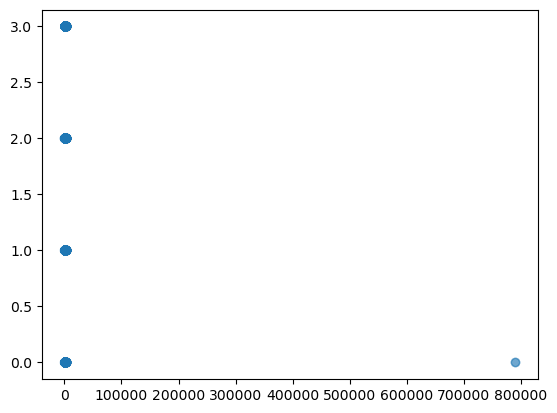

In [324]:
plt.scatter(data_raw['battery_power'], data_raw['price_range'], alpha=0.4)
plt.show()

Заметим, что есть выбросы

In [325]:
data_raw['battery_power'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     503.96
0.010     508.00
0.050     568.00
0.100     630.60
0.500    1231.00
0.900    1852.80
0.950    1931.20
0.990    1988.08
0.995    1994.00
Name: battery_power, dtype: float64

99,9% значений емкости батареи находятся в диапазоне от 504 до 1993

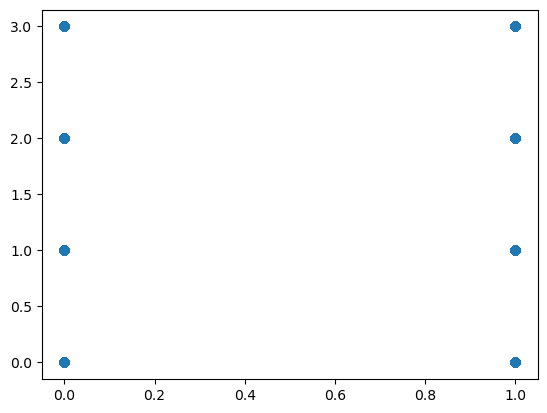

In [326]:
plt.scatter(data_raw['blue'], data_raw['price_range'], alpha=0.4)
plt.show()

In [327]:
data_raw['blue'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    0.0
0.900    1.0
0.950    1.0
0.990    1.0
0.995    1.0
Name: blue, dtype: float64

Выбросов нет

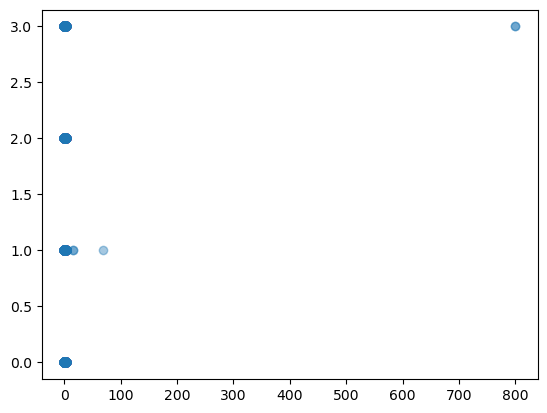

In [328]:
plt.scatter(data_raw['clock_speed'], data_raw['price_range'], alpha=0.4)
plt.show()

In [329]:
data_raw['clock_speed'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.5
0.010    0.5
0.050    0.5
0.100    0.5
0.500    1.5
0.900    2.7
0.950    2.8
0.990    3.0
0.995    3.0
Name: clock_speed, dtype: float64

Есть выбросы, которые удалим далее

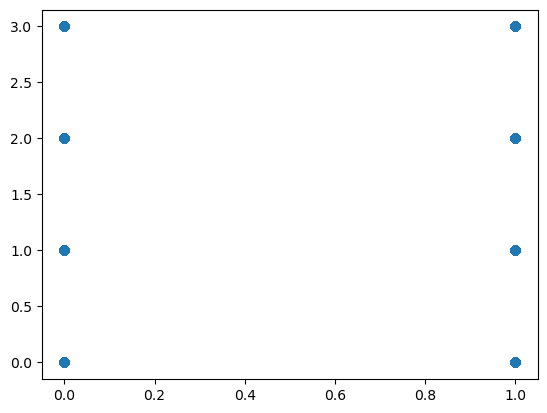

In [330]:
plt.scatter(data_raw['dual_sim'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

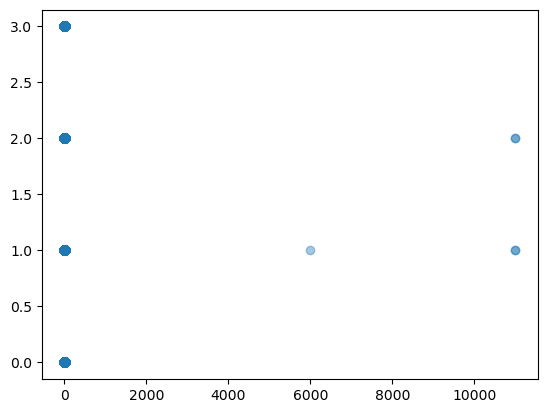

In [331]:
plt.scatter(data_raw['fc'], data_raw['price_range'], alpha=0.4)
plt.show()

In [332]:
data_raw['fc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.00
0.010     0.00
0.050     0.00
0.100     0.00
0.500     3.00
0.900    11.00
0.950    13.00
0.990    16.08
0.995    18.00
Name: fc, dtype: float64

Есть выбросы

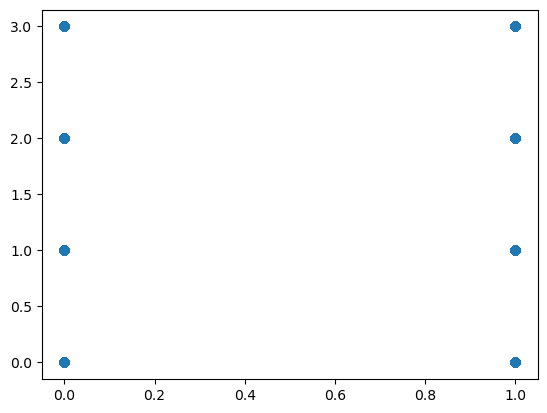

In [333]:
plt.scatter(data_raw['four_g'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

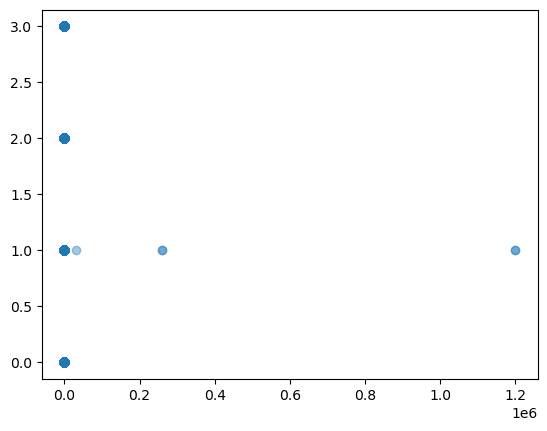

In [334]:
plt.scatter(data_raw['int_memory'], data_raw['price_range'], alpha=0.4)
plt.show()

In [335]:
data_raw['int_memory'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     5.0
0.100     8.0
0.500    33.0
0.900    57.0
0.950    61.0
0.990    64.0
0.995    64.0
Name: int_memory, dtype: float64

Есть выбросы

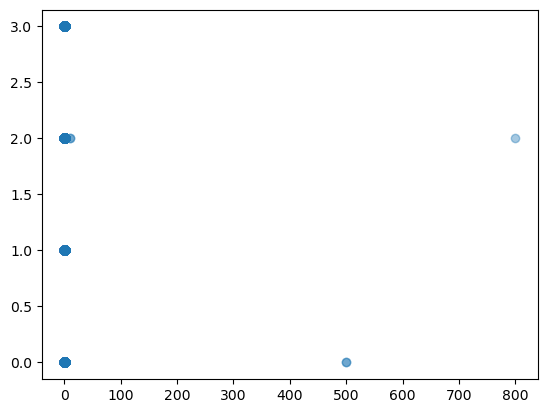

In [336]:
plt.scatter(data_raw['m_dep'], data_raw['price_range'], alpha=0.4)
plt.show()

In [337]:
data_raw['m_dep'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.1
0.010    0.1
0.050    0.1
0.100    0.1
0.500    0.5
0.900    0.9
0.950    1.0
0.990    1.0
0.995    1.0
Name: m_dep, dtype: float64

Есть выбросы

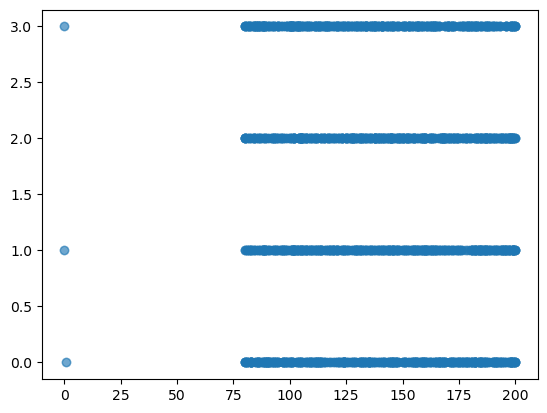

In [338]:
plt.scatter(data_raw['mobile_wt'], data_raw['price_range'], alpha=0.4)
plt.show()

In [339]:
data_raw['mobile_wt'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     80.0
0.010     80.0
0.050     86.0
0.100     91.0
0.500    141.0
0.900    189.0
0.950    196.0
0.990    199.0
0.995    200.0
Name: mobile_wt, dtype: float64

Есть выбросы

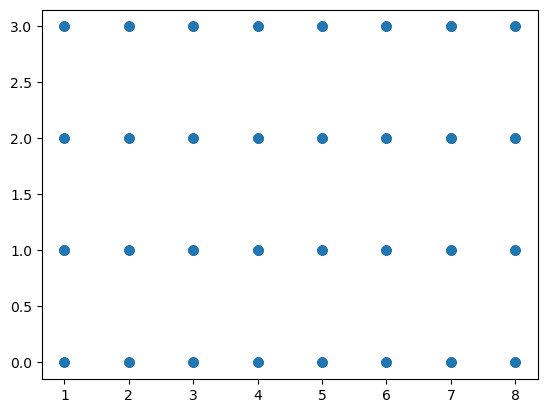

In [340]:
plt.scatter(data_raw['n_cores'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

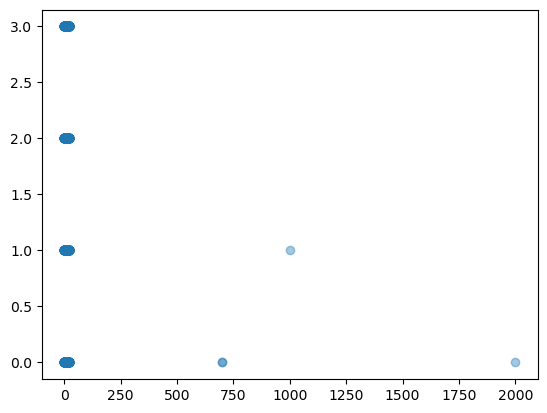

In [341]:
plt.scatter(data_raw['pc'], data_raw['price_range'], alpha=0.4)
plt.show()

In [342]:
data_raw['pc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     1.0
0.500    10.0
0.900    18.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: pc, dtype: float64

Есть выбросы

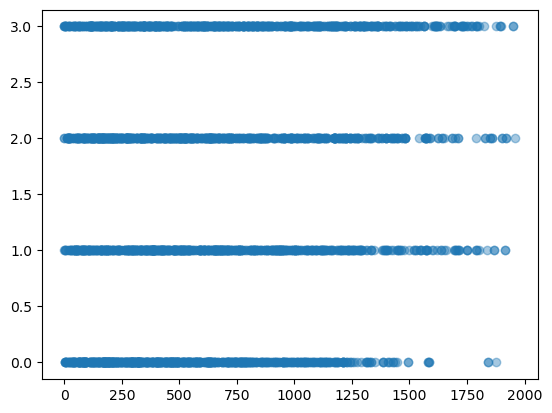

In [343]:
plt.scatter(data_raw['px_height'], data_raw['price_range'], alpha=0.4)
plt.show()

In [344]:
data_raw['px_height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       4.00
0.010      14.91
0.050      70.00
0.100     126.10
0.500     561.00
0.900    1285.00
0.950    1486.00
0.990    1792.27
0.995    1869.00
Name: px_height, dtype: float64

Выбросов нет

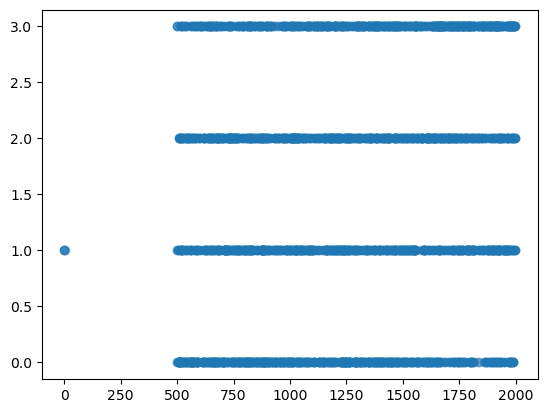

In [345]:
plt.scatter(data_raw['px_width'], data_raw['price_range'], alpha=0.4)
plt.show()

In [346]:
data_raw['px_width'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     507.0
0.010     511.0
0.050     573.4
0.100     660.0
0.500    1247.0
0.900    1854.0
0.950    1929.0
0.990    1987.0
0.995    1992.0
Name: px_width, dtype: float64

Есть выбросы

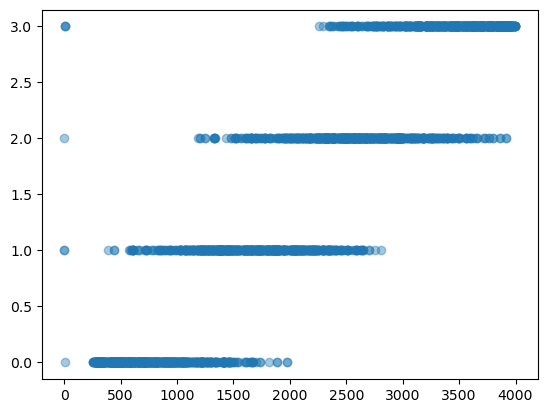

In [347]:
plt.scatter(data_raw['ram'], data_raw['price_range'], alpha=0.4)
plt.show()

In [348]:
data_raw['ram'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     272.82
0.010     290.70
0.050     441.00
0.100     597.40
0.500    2169.00
0.900    3652.00
0.950    3828.10
0.990    3959.00
0.995    3970.00
Name: ram, dtype: float64

Есть выбросы

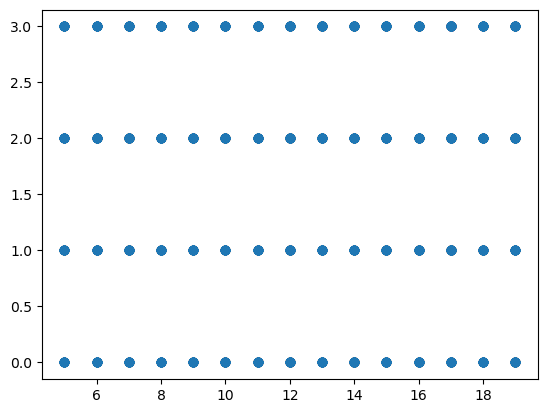

In [349]:
plt.scatter(data_raw['sc_h'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

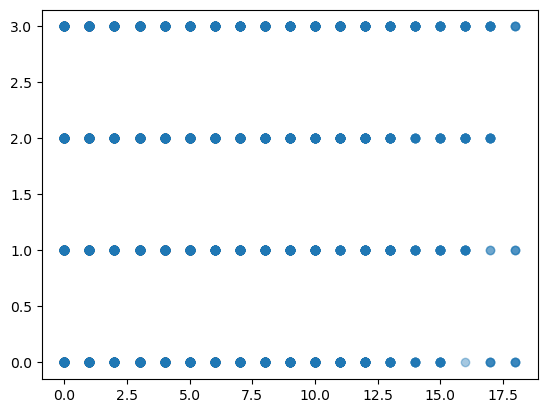

In [350]:
plt.scatter(data_raw['sc_w'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

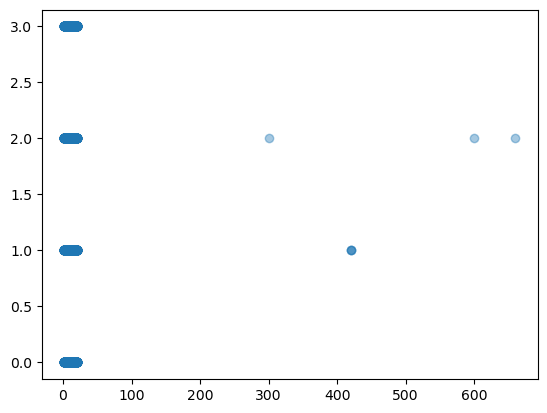

In [351]:
plt.scatter(data_raw['talk_time'], data_raw['price_range'], alpha=0.4)
plt.show()

In [352]:
data_raw['talk_time'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     3.0
0.100     4.0
0.500    11.0
0.900    19.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: talk_time, dtype: float64

Выбросы есть

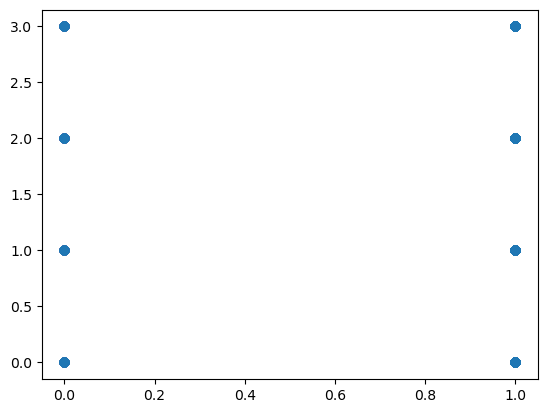

In [353]:
plt.scatter(data_raw['three_g'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

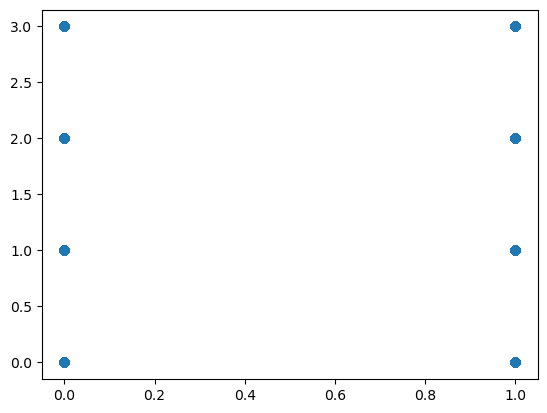

In [354]:
plt.scatter(data_raw['touch_screen'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

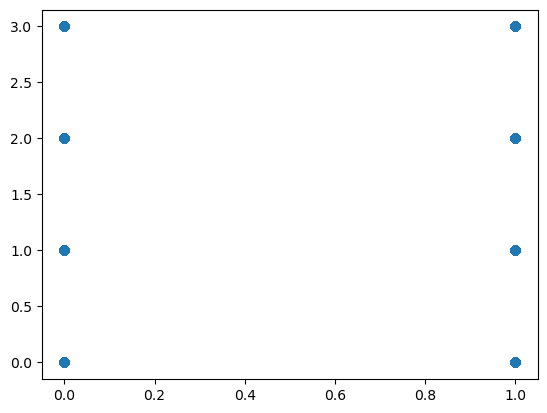

In [355]:
plt.scatter(data_raw['wifi'], data_raw['price_range'], alpha=0.4)
plt.show()

Выбросов нет

Удалим все строки таблицы, в которых признаки с выбросами выходят за пределы квантилей $0.005$, $0.995$.

In [356]:
rows_to_drop = data_raw[
    (data_raw['battery_power'] < data_raw['battery_power'].quantile(0.005)) | (data_raw['battery_power'] > data_raw['battery_power'].quantile(0.995)) |
    (data_raw['clock_speed']  < data_raw['clock_speed' ].quantile(0.005)) | (data_raw['clock_speed']  > data_raw['clock_speed' ].quantile(0.995)) |
    (data_raw['fc']  < data_raw['fc' ].quantile(0.005)) | (data_raw['fc']  > data_raw['fc' ].quantile(0.995)) |
    (data_raw['int_memory']  < data_raw['int_memory' ].quantile(0.005)) | (data_raw['int_memory']  > data_raw['int_memory' ].quantile(0.995)) |
    (data_raw['m_dep']  < data_raw['m_dep' ].quantile(0.005)) | (data_raw['m_dep']  > data_raw['m_dep' ].quantile(0.995)) |
    (data_raw['mobile_wt']  < data_raw['mobile_wt' ].quantile(0.005)) | (data_raw['mobile_wt']  > data_raw['mobile_wt' ].quantile(0.995)) |
    (data_raw['pc']  < data_raw['pc' ].quantile(0.005)) | (data_raw['pc']  > data_raw['pc' ].quantile(0.995)) |
    (data_raw['px_width']  < data_raw['px_width' ].quantile(0.005)) | (data_raw['px_width']  > data_raw['px_width' ].quantile(0.995)) |
    (data_raw['ram']  < data_raw['ram' ].quantile(0.005)) | (data_raw['ram']  > data_raw['ram' ].quantile(0.995)) |
    (data_raw['talk_time']  < data_raw['talk_time' ].quantile(0.005)) | (data_raw['talk_time']  > data_raw['talk_time' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2879, 21)

In [357]:
rows_to_drop

Index([  18,   24,   43,   61,   69,  152,  167,  185,  193,  219,
       ...
       2739, 2754, 2772, 2780, 2806, 2875, 2879, 2896, 2914, 2944],
      dtype='int64', length=121)

 # Визуализация данных и вычисление основных характеристик

In [358]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2874.000000,2864.000000,2874.000000,2867.000000,2873.000000,2860.000000,2872.000000,2870.000000,2870.000000,2870.000000,...,2871.000000,2874.000000,2876.000000,2872.000000,2873.000000,2870.000000,2871.000000,2876.000000,2876.000000,2879.000000
mean,1238.826722,0.486034,1.522930,0.511336,4.300035,0.514336,32.466574,0.501429,140.709059,4.510453,...,643.615674,1247.704593,2135.609179,12.336351,5.743126,11.003833,0.756183,0.507650,0.512865,1.513025
std,439.068508,0.499892,0.821102,0.499959,4.354478,0.499882,18.187908,0.286092,35.359785,2.289076,...,444.805337,429.223234,1083.050846,4.210546,4.365940,5.433362,0.429459,0.500028,0.499921,1.122030
min,504.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,507.000000,273.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,850.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,280.000000,874.000000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.500000
50%,1231.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,561.000000,1247.000000,2181.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.700000,171.000000,7.000000,...,952.000000,1617.750000,3068.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1994.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1992.000000,3970.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


В описании видим:

1. count - количество значений для каждого признака. Из-за пропусков в таблице все значения различны. Минимальное значение у dual_sim = 2867, число пропусков = 12, что составлеят 0,4% от общего числа.
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение
5. 25% - первый квартиль
6. 50% - медиана
7. 75% - третий квартиль
8. max - максимальное значение (заметим подозрительно большие значения - выбросы, с которыми будм бороться в дальнейшем)

Рассмотрим некоторые из характеристик

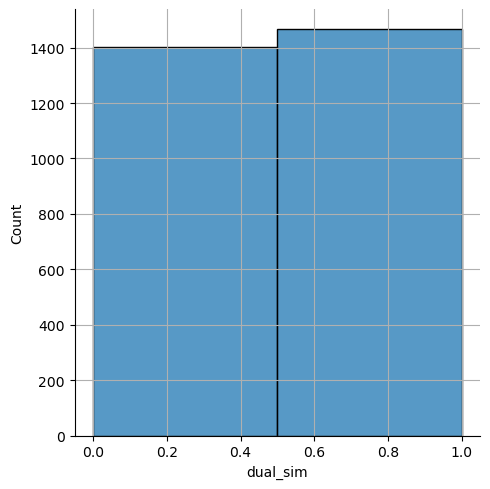

In [359]:
sns.displot(data['dual_sim'], bins=2)
plt.grid()
plt.show()

На гистограмме видно распределение по 2 категориям: наличие и отсутствие поддержки 2 симкарт. Среднее значение = 0.511336, отклонение = 0.499959. Можно сделать вывод, что чуть больше половины моделей имеет 2 симкарты.

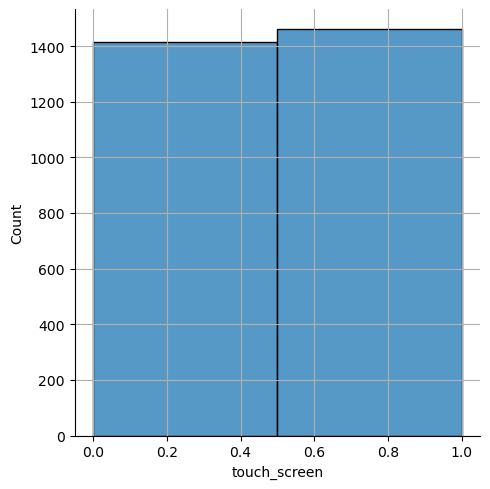

In [360]:
sns.displot(data['touch_screen'], bins=2)
plt.grid()
plt.show()

Видим нормальное распределение по категориям: наличие и отсутствие сенсорного экрана. При среднем = 0.507650 и отклонении = 0.500028, то есть, число моделей с сенсорным экраном и обычным примерно равны.

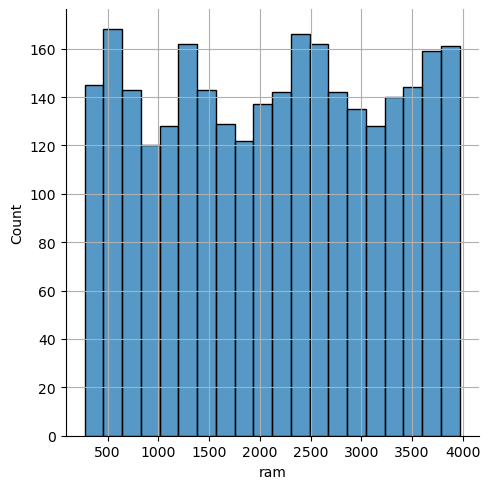

In [361]:
sns.displot(data['ram'], bins=20)
plt.grid()
plt.show()

Распределение оперативной памяти при среднем = 2136 и отклонении = 1083. При этом 25% = 1210, 50% = 2181, 75% = 3068.

Вычислим матрицу корреляции

In [362]:
corr_matrix = data.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011998,0.027703,-0.029329,0.045006,0.027099,-0.004363,0.036367,0.009955,-0.030992,...,0.016592,-0.002324,0.008383,-0.038116,-0.033667,0.052359,0.008346,-0.011229,0.005474,0.209181
blue,0.011998,1.000000,0.038897,0.026642,0.012370,0.005286,0.054356,0.006894,-0.024746,0.042086,...,-0.004650,-0.036353,0.031686,-0.012713,0.009608,0.002202,-0.052221,0.005661,-0.024131,0.023076
clock_speed,0.027703,0.038897,1.000000,0.021106,0.015256,-0.037968,0.011620,-0.024136,0.017319,-0.014519,...,-0.019039,-0.006861,0.012411,-0.011283,-0.002629,-0.013898,-0.047172,0.023502,-0.034809,0.002343
dual_sim,-0.029329,0.026642,0.021106,1.000000,-0.028922,0.002153,-0.012233,-0.018826,-0.003636,-0.019953,...,-0.022964,0.007001,0.046006,-0.018242,-0.017694,-0.037101,-0.007899,-0.004523,0.039253,0.024439
fc,0.045006,0.012370,0.015256,-0.028922,1.000000,-0.007077,-0.028808,-0.001025,0.017778,-0.016395,...,-0.008213,-0.015686,0.003936,-0.013279,-0.005489,-0.009514,0.012990,-0.002362,0.016641,0.014633
four_g,0.027099,0.005286,-0.037968,0.002153,-0.007077,1.000000,0.009793,-0.015670,-0.020902,-0.027199,...,-0.026712,0.012828,-0.001045,0.027707,0.043867,-0.052692,0.585862,0.018748,-0.011024,0.008688
int_memory,-0.004363,0.054356,0.011620,-0.012233,-0.028808,0.009793,1.000000,0.015662,-0.030230,-0.018749,...,0.008251,-0.003289,0.030967,0.044676,0.024482,0.006761,-0.018180,-0.008836,0.009111,0.040132
m_dep,0.036367,0.006894,-0.024136,-0.018826,-0.001025,-0.015670,0.015662,1.000000,0.014780,-0.013536,...,0.003548,0.020210,-0.003904,-0.023769,-0.014319,0.005794,-0.033816,0.004184,-0.035118,0.004452
mobile_wt,0.009955,-0.024746,0.017319,-0.003636,0.017778,-0.020902,-0.030230,0.014780,1.000000,-0.027086,...,0.004664,-0.001916,0.009560,-0.042164,-0.020148,-0.002075,0.001926,-0.025195,0.003934,-0.022229
n_cores,-0.030992,0.042086,-0.014519,-0.019953,-0.016395,-0.027199,-0.018749,-0.013536,-0.027086,1.000000,...,0.000687,0.030164,0.022090,0.006798,0.033627,0.000676,-0.019395,0.017690,-0.014078,0.020561


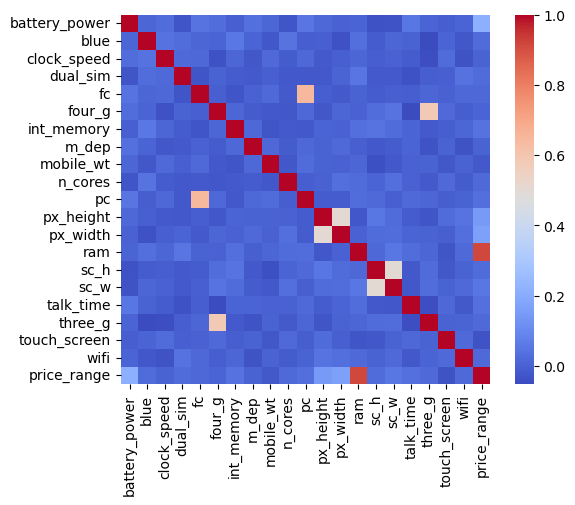

In [363]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
plt.show()

Выведем коэффициенты корреляции, большие заданного значения:

In [364]:
corr_matrix >= 0.5

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blue,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
clock_speed,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dual_sim,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fc,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
four_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
int_memory,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
m_dep,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
mobile_wt,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
n_cores,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Коэффициент корреляции > 0,5 имеют: px_width и px_height, sc_h и sc_w, four_g и three_g, price_range и ram, что говорит о наличие связи между признаками.
Для признаков, у которых коэффициент корреляции < 0,5, можно сказать, что связь между ними слабая

Перейдем к рассмотрению категориальных признаков

In [365]:
data['blue'].value_counts()

blue
0.0    1472
1.0    1392
Name: count, dtype: int64

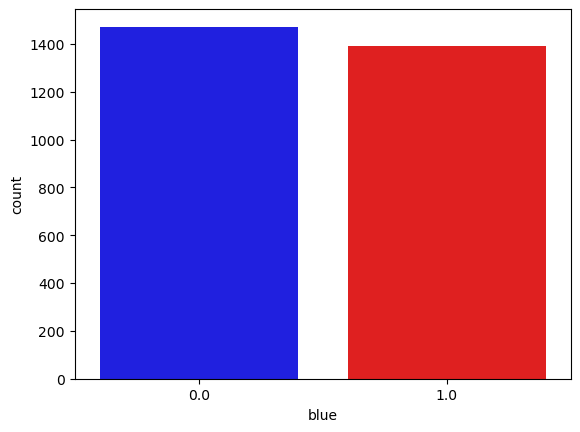

In [366]:
sns.countplot(x='blue', data=data, hue='blue', palette=['blue', 'red'])
plt.legend().remove()
plt.show()

Число моделей с bluetooth приблизительно равно числу моделей без него.

In [367]:
data['dual_sim'].value_counts()

dual_sim
1.0    1466
0.0    1401
Name: count, dtype: int64

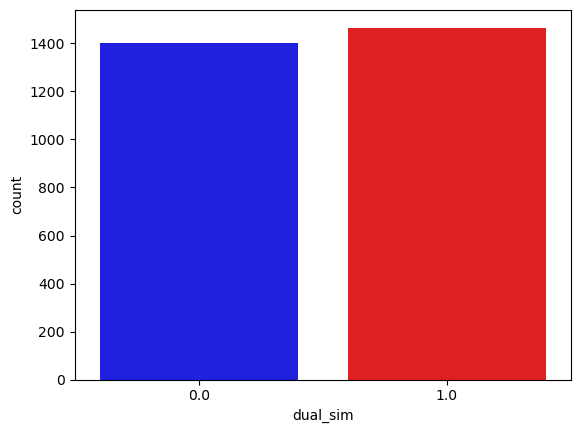

In [368]:
sns.countplot(x='dual_sim', data=data, hue='dual_sim', palette=['blue','red'])
plt.legend().remove()
plt.show()

Число моделей с поддержкой 2 симкарт немного больше.

In [369]:
data['four_g'].value_counts()

four_g
1.0    1471
0.0    1389
Name: count, dtype: int64

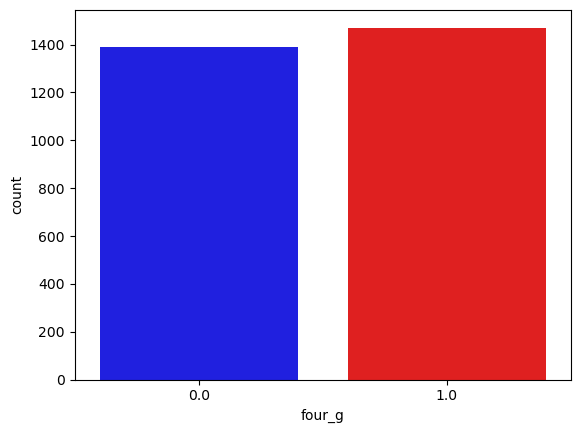

In [370]:
sns.countplot(x='four_g', data=data, hue='four_g', palette=['blue','red'])
plt.legend().remove()
plt.show()

Число моделей с поддержкой 4G немного больше.

In [371]:
data['three_g'].value_counts()

three_g
1.0    2171
0.0     700
Name: count, dtype: int64

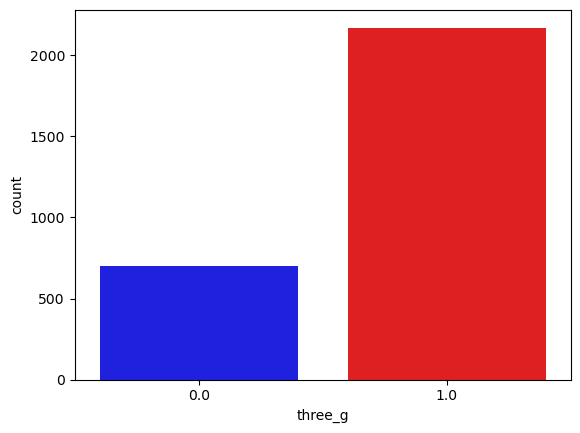

In [372]:
sns.countplot(x='three_g', data=data, hue='three_g', palette=['blue','red'])
plt.legend().remove()
plt.show()

Число моделей с поддержкой 3G примерно в 3 раза больше

In [373]:
data['touch_screen'].value_counts()

touch_screen
1.0    1460
0.0    1416
Name: count, dtype: int64

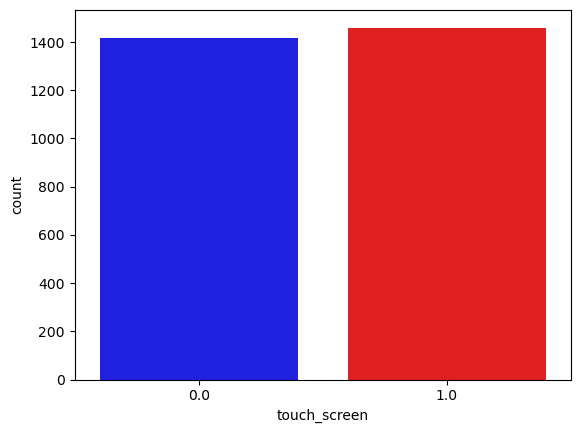

In [374]:
sns.countplot(x='touch_screen', data=data, hue='touch_screen', palette=['blue','red'])
plt.legend().remove()
plt.show()

Число моделей с сенсорным экраном приблизительно равно числу моделей без него

In [375]:
data['wifi'].value_counts()

wifi
1.0    1475
0.0    1401
Name: count, dtype: int64

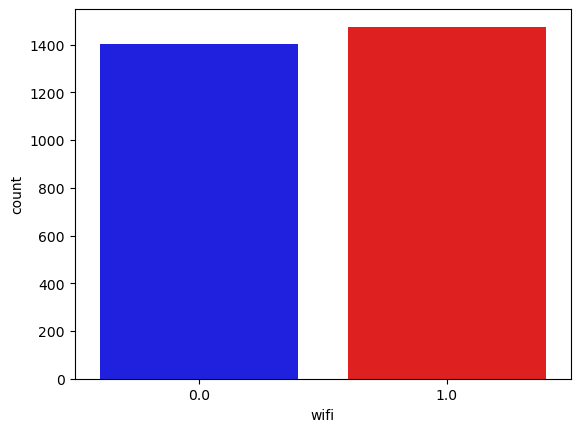

In [376]:
sns.countplot(x='wifi', data=data, hue='wifi', palette=['blue','red'])
plt.legend().remove()
plt.show()

Число моделей с поддержкой WiFi немного больше.

In [377]:
data['price_range'].value_counts()

price_range
2    733
3    732
0    720
1    694
Name: count, dtype: int64

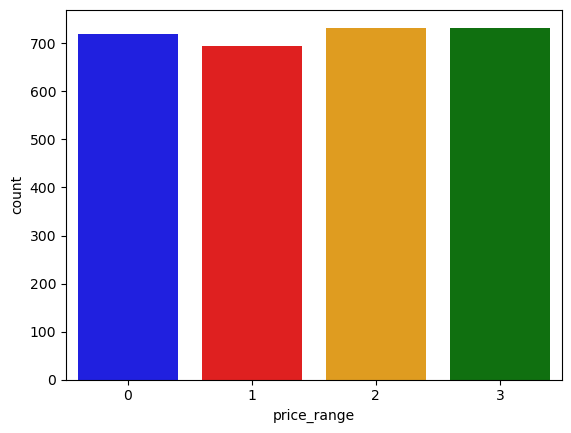

In [378]:
sns.countplot(x='price_range', data=data, hue='price_range', palette=['blue','red','orange','green'])
plt.legend().remove()
plt.show()

Ценовой диапозон выставлен примерно одинаково

Удалим строки с пропущенными значениями

# Обработка пропущенных значений
Если данные содержат пропущенные значения, то имеется две простые альтернативы:
- удалить столбцы с такими значениями (`data = data.dropna(axis = 1)`),
- удалить строки с такими значениями (`data = data.dropna(axis = 0)`).

После этого данных может стать совсем мало.

Куда более эффективным (и в то же время по-прежнему простым) методом обычно является заполнение пропущенных значений для каждой количественной переменной их средним или медианным значением.
Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

Выведем столбцы с пустотами и их количество

In [379]:
data_raw.isna().sum()

battery_power     7
blue             15
clock_speed       5
dual_sim         15
fc                7
four_g           19
int_memory        7
m_dep             9
mobile_wt         9
n_cores           9
pc               13
px_height         8
px_width          5
ram               5
sc_h              7
sc_w              6
talk_time         9
three_g           8
touch_screen      3
wifi              3
price_range       0
dtype: int64

In [380]:
data.fillna(data_raw.median(axis=0), inplace=True)
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Обработка категориальных признаков
Обрабатывать категориальные признаки не нужно, так как они все уже заданы числовыми значениями
#Нормализация
Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых признаков.
Проведем нормализацию с помощью линейного преобразования к отрезку [0, 1]

In [381]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,...,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000
mean,0.493163,0.483501,0.409156,0.513373,0.238740,0.517541,0.491417,0.446027,0.505916,0.501265,...,0.328258,0.498790,0.503826,0.523967,0.318976,0.500212,0.756860,0.508163,0.513373,0.504342
std,0.294421,0.499815,0.328155,0.499908,0.241686,0.499779,0.292997,0.317383,0.294204,0.326525,...,0.226637,0.288788,0.292801,0.300390,0.242307,0.301381,0.429053,0.500020,0.499908,0.374010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232550,0.000000,0.080000,0.000000,0.055556,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.142857,0.247138,0.253719,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.166667
50%,0.487919,0.000000,0.400000,1.000000,0.166667,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.286224,0.498316,0.515012,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.666667
75%,0.746980,1.000000,0.680000,1.000000,0.388889,1.000000,0.741935,0.666667,0.758333,0.857143,...,0.485459,0.747475,0.755748,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Обучающая и тестовая выборки
Для классификации используем все признаки. Разобьем данные на обучающую и тестовую выборки. За обучающую примем 75%, оставшиеся  - за тестовую

In [382]:
X = data_norm.drop(['price_range'], axis=1)
y = data['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(2159, 720)

### K ближайших соседей
Пусть К = 5 (по умолчанию)

In [383]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 66.60%, Test: 45.69%. 


Увеличим число соседей до 7

In [384]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)
knn_train_pred = 100 * knn_7.score(X_train, y_train)
knn_test_pred = 100 * knn_7.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 61.83%, Test: 47.92%. 


Точность полученной модели увеличилась, попробуем К = 3

In [385]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_train_pred = 100 * knn_3.score(X_train, y_train)
knn_test_pred = 100 * knn_3.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 78.97%, Test: 48.89%. 


Точность увеличилась. Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию

In [386]:
knn_train_pred = knn_def.score(X_train, y_train)
knn_test_pred = knn_def.score(X_test, y_test)
MSE_train = np.mean((knn_train_pred - y_train)**2)
MSE_test  = np.mean((knn_test_pred - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 1.97, Test: 2.39. 


### Дерево решений
Воспользуемся параметрами по умолчанию - глубина отсутствует

In [387]:
from sklearn.tree import DecisionTreeClassifier
desTrCl = DecisionTreeClassifier()
desTrCl.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl.score(X_train, y_train)
print ('Depth:', desTrCl.get_depth())
print ('Leaves:', desTrCl.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 12
Leaves: 161
Accuracy. Train : 100.00%, Test: 90.56%. 


Максимальная глубина = 12. Уменьшим до 6

In [388]:
desTrCl_6 = DecisionTreeClassifier(max_depth=6)
desTrCl_6.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_6.score(X_train, y_train)
print ('Depth:', desTrCl_6.get_depth())
print ('Leaves:', desTrCl_6.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_6.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 6
Leaves: 56
Accuracy. Train : 93.10%, Test: 88.47%. 


Качество модели на тестовой и обучающей выборках снизилось.

Увеличим глубину до 9

In [389]:
desTrCl_9 = DecisionTreeClassifier(max_depth=9)
desTrCl_9.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_9.score(X_train, y_train)
print ('Depth:', desTrCl_9.get_depth())
print ('Leaves:', desTrCl_9.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_9.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 9
Leaves: 142
Accuracy. Train : 99.03%, Test: 90.56%. 


Качество модели на тестовой и обучающей выборках повысилось.

Алгоритм дерева решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.

# Общие выводы

В ходе выполнения данной лабораторной работы мы произвели анализ данных о ценовом диапазоне мобильных телефонов и решение задачи классификации с помощью моделей, которые были натренированы методами К-ближайших соседей и дерева решений. С помощью методов визуализации смогли понять взаимосвязь между признаками и результатом. Также произвели обработку данных перед запуском алгоритмов обучения. Помимо этого, были проведены: работа с выбросами, обработка пропущенных значений, нормализация количественных признаков, выбор алгоритма классификации и проверка качества модели


# КЛАСТЕРИЗАЦИЯ

In [390]:
scaler = StandardScaler()
X_features = data_norm.drop('price_range', axis=1)
X_scaled = scaler.fit_transform(X_features)

PCA объясняет 16.5% дисперсии


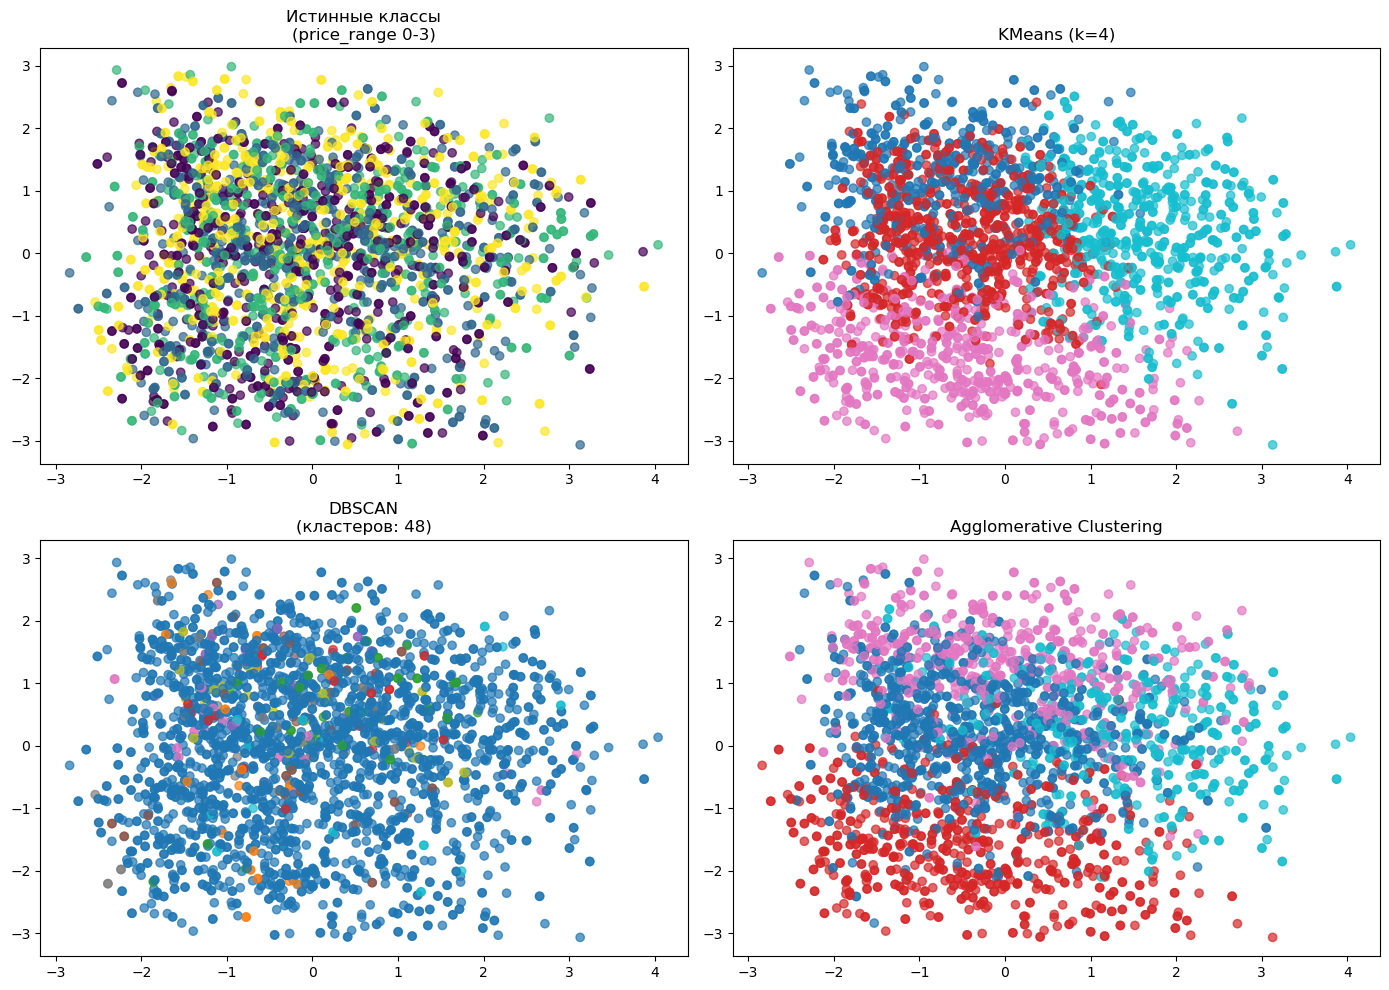

Сравнение с истинными метками
        Метод   ARI
       KMeans 0.007
       DBSCAN 0.029
Agglomerative 0.004


In [391]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA объясняет {sum(pca.explained_variance_ratio_)*100:.1f}% дисперсии")

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=3.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Agglomerative (третий метод)
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Исходные классы
axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=data['price_range'], cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Истинные классы\n(price_range 0-3)')

# KMeans
axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.7)
axes[0, 1].set_title('KMeans (k=4)')

# DBSCAN
axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', alpha=0.7)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
axes[1, 0].set_title(f'DBSCAN\n(кластеров: {n_clusters_dbscan})')

# Agglomerative
axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='tab10', alpha=0.7)
axes[1, 1].set_title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

# Сравнение с истинными метками
print("Сравнение с истинными метками")
true_labels = data['price_range']
results = []

for name, labels in [('KMeans', kmeans_labels), 
                     ('DBSCAN', dbscan_labels), 
                     ('Agglomerative', agglo_labels)]:
    
    if name == 'DBSCAN':
        mask = labels != -1
        if sum(mask) > 0:
            ari = adjusted_rand_score(true_labels[mask], labels[mask])
        else:
            ari = 0
    else:
        ari = adjusted_rand_score(true_labels, labels)
    
    results.append({'Метод': name, 'ARI': f"{ari:.3f}"})

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


1. Все методы кластеризации показали низкое качество (ARI < 0.03)
2. DBSCAN обнаружил много шума (87% точек) и 48 мелких кластеров
3. PCA объясняет только 16.5% дисперсии
4. Кластеры не соответствуют истинным ценовым диапазонам
5. Данные не имеют естественной кластерной структуры
6. Хорошие результаты классификации достигаются за счет 
   сложных взаимосвязей признаков, а не явных кластеров